In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from functions import *


In [3]:
# These are the parameters for the case I want to analyze, which are not necessarily the same as those I generate

qhatmix=1.5 #GeV^2/fm
q=qhatmix*25.77 #fm^(-3)
EGev = 100 # Energy in Gev
E = EGev * 5.076 # Conversion factor to fm^-1
#z=0.4

Nc=3
CF=(Nc**2-1)/(2*Nc)

#a=lambda z: np.sqrt(q/w)
#Ou=(1-1j)/2*a
#Ov=(1+1j)/2*a

# Numerical parameters
ma=3 # This is the grid size in fm
u1max=ma
u2max=ma
v1max=ma
v2max=ma
u1min=-u1max
u2min=-u2max
v1min=-v1max
v2min=-v2max
#tmax=1e-2
t0=0
tmax=2 # Maximum medium length in fm


N=60 # Number of grid points. Should be at least 40 for okay results, ideally more
Nu1 = N
Nu2 = N
Nv1 = N
Nv2 = N


du1 = (u1max-u1min)/(Nu1-1)
du2 = (u2max-u2min)/(Nu2-1)
dv1 = (v1max-v1min)/(Nv1-1)
dv2 = (v2max-v2min)/(Nv2-1)
hu1,hu2,hv1,hv2 = int(Nu1/2),int(Nu2/2),int(Nv1/2),int(Nv2/2)

dtdusq=0.5

deltat=dtdusq*du1**2
Nt=round((tmax-t0)/deltat) # The number of time points is decided by the griz size and number of grid points
#Nt=round(Nt/10)*10

dt = (tmax-t0)/(Nt-1)
t = np.linspace(t0, tmax, Nt)

In [4]:
points = 10
lower_z = 0.01
upper_z = 0.5
log_oneover_z = np.linspace(np.log(1/lower_z),np.log(1/upper_z),points)
z_values = np.exp(-log_oneover_z)

# Use theta as proxy for p, as p ~ z*(1-z)*th*E
lower_th = 0.01
upper_th = 0.5 
log_oneover_th = np.linspace(np.log(1/lower_th),np.log(1/upper_th),points)
theta_values = np.exp(-log_oneover_th)

print(log_oneover_z)
print(z_values)


Z, TH = np.meshgrid(log_oneover_z,log_oneover_th)

[4.60517019 4.17050096 3.73583174 3.30116252 2.86649329 2.43182407
 1.99715485 1.56248563 1.1278164  0.69314718]
[0.01       0.01544452 0.02385332 0.03684031 0.0568981  0.08787639
 0.13572088 0.2096144  0.3237394  0.5       ]


In [5]:
def pl_ratio(zvalues,ratio):

    p = np.nanmax(np.nan_to_num(zvalues,nan=1, posinf=1,neginf=1))
    m = np.nanmin(np.nan_to_num(zvalues,nan=1, posinf=1,neginf=1))
    if ratio:
        n = round(max([p-1,1-m]),2)
        cent = 1
    else:
        n = round(max(abs(p),abs(m)))
        cent = 0
    if n==0:
        n=0.01

    #from matplotlib import rc
    #rc('font',**{'family':'serif','sans-serif':['Helvetica']})
    #rc('text', usetex=True)
    #rc('text.latex', preamble=r'\usepackage{amssymb}')

    from matplotlib.pyplot import figure
    figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    
    #plt.xlabel(r'$\ln(1/\theta$)', fontsize=20)
    #plt.ylabel(r'$\ln(1/z$)', fontsize=20)
    plt.tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=18)
    #plt.tight_layout()

    plt.xlabel('log(1/θ)', fontsize=20)
    plt.ylabel('log(1/z)', fontsize=20)
    
    num=9
    ticks = np.linspace(cent-n,cent+n,num)
    dtick = ticks[1]-ticks[0]
    lines = np.linspace(cent-n-dtick/2,cent+n+dtick/2,num+1)

    plt.contourf(TH,Z,zvalues,levels=lines,vmin=lines[1],vmax = lines[num-1],cmap=plt.get_cmap('RdBu_r'))
    cbar = plt.colorbar(ticks=ticks)
    cbar.ax.tick_params(labelsize=18)

In [18]:
time_frac = 0.5
time_n = int(len(t)*time_frac)-1


ratio_Nc_full = np.zeros([points,points])
ratio_diag_full = np.zeros([points,points])
error = np.zeros([points,points])


for i,z in enumerate(z_values):
    for j,theta in enumerate(theta_values):

        all = np.load(f'{filename}_theta={theta:.3f}_z={z:.3f}_L={tmax}_E={EGev}_gridpoints={N}_gridsize={ma}.npy')
        #t = all[0]
        full2 = all[2]
        Nc2 = all[4]
        diag2 = all[6]
        diag2_fasit = all[8]

        ratio_Nc_full[j,i] = np.real(Nc2[time_n])/np.real(full2[time_n])
        ratio_diag_full[j,i] = np.real(diag2[time_n])/np.real(full2[time_n])
        error[j,i] = (np.real(diag2_fasit[time_n])-np.real(diag2[time_n]))/np.real(diag2[time_n])



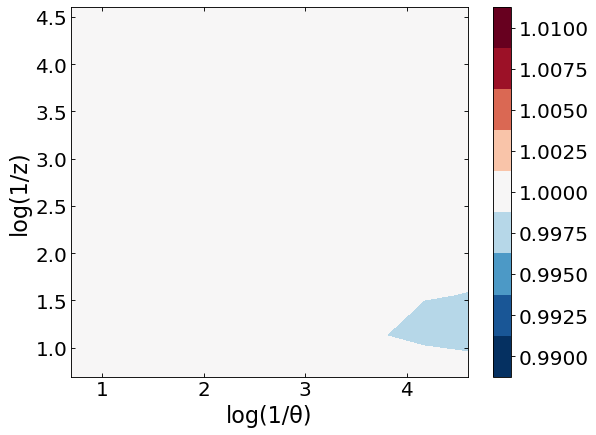

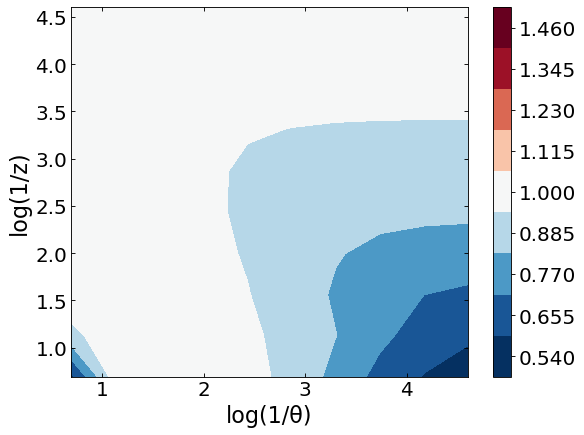

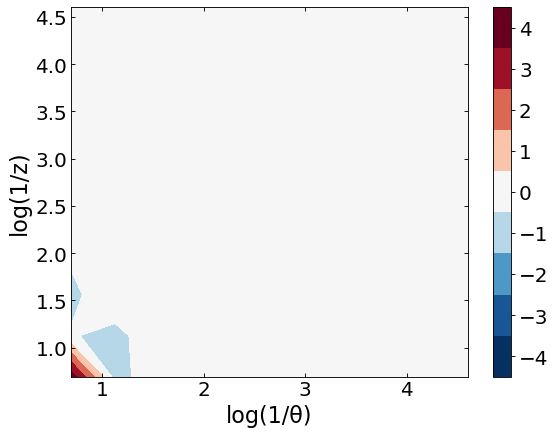

In [19]:
pl_ratio(ratio_Nc_full,True)
pl_ratio(ratio_diag_full,True)
pl_ratio(error,False)

0.036840314986403846


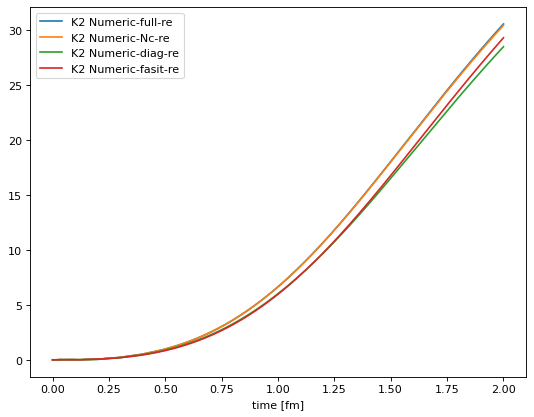

In [15]:
stop_frac = 1
stop_i = int(len(t)*stop_frac)

theta = theta_values[3]
print(theta)
z = z_values[4]

all = np.load(f'{filename}_theta={theta:.3f}_z={z:.3f}_L={tmax}_E={EGev}_gridpoints={N}_gridsize={ma}.npy')
t = all[0]
full2 = all[2]
Nc2 = all[4]
diag2 = all[6]
diag2_fasit = all[8]

from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(t[0:stop_i],np.real(full2[0:stop_i]), label='K2 Numeric-full-re')
plt.plot(t[0:stop_i],np.real(Nc2[0:stop_i]), label='K2 Numeric-Nc-re')
plt.plot(t[0:stop_i],np.real(diag2[0:stop_i]), label='K2 Numeric-diag-re')
plt.plot(t[0:stop_i],np.real(diag2_fasit[0:stop_i]), label='K2 Numeric-fasit-re')

plt.xlabel('time [fm]')


plt.legend()
plt.show()

In [9]:
print(t[0:10])

[0.        +0.j 0.00518135+0.j 0.01036269+0.j 0.01554404+0.j
 0.02072539+0.j 0.02590674+0.j 0.03108808+0.j 0.03626943+0.j
 0.04145078+0.j 0.04663212+0.j]
